In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import cvutils
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.utils import resample
from scipy.misc import imread, toimage

%matplotlib inline

In [2]:
root_path = 'C:\\Users\\Pesquisa\\Pictures\\Singularidades\\FVC2006-500\\Samples\\'
samples_path = root_path + "samples.png"

In [3]:
samples_core = cv2.imread(root_path+"cores.png", cv2.IMREAD_GRAYSCALE)
samples_delta = cv2.imread(root_path+"deltas.png", cv2.IMREAD_GRAYSCALE)
samples_neg = cv2.imread(root_path+"negs.png", cv2.IMREAD_GRAYSCALE)

np.random.seed(42)
np.random.shuffle(samples_core)
np.random.shuffle(samples_delta)
np.random.shuffle(samples_neg)

n_test = 500
samples_train = np.vstack((samples_core[:-n_test], samples_delta[:-n_test], samples_neg[:-n_test]))
samples_test = np.vstack((samples_core[-n_test:], samples_delta[-n_test:], samples_neg[-n_test:]))

n_cores, n_deltas, n_negs = samples_core.shape[0]-n_test, samples_delta.shape[0]-n_test, samples_neg.shape[0]-n_test

labels_train = np.concatenate( ( np.ones(n_cores), 2*np.ones(n_deltas), 3*np.ones(n_negs) ) ).astype(np.int)
labels_test = np.concatenate( ( np.ones(n_test), 2*np.ones(n_test), 3*np.ones(n_test) ) ).astype(np.int)

print(samples_train.shape, samples_test.shape, labels_train.shape, labels_test.shape)
print(np.bincount(labels_train), np.bincount(labels_test))

(4006, 1600) (1500, 1600) (4006,) (1500,)
[   0 1172 1480 1354] [  0 500 500 500]


In [4]:
def compute_hog_descriptors(samples):
    im_array = []
    for sample in samples:
        im = np.reshape(sample, (40,40))
        
        hog = cv2.HOGDescriptor((40,40), (16,16), (8,8), (8,8), 9)
        hog_desc = hog.compute(im)
        
        im_array.append(hog_desc.ravel())
        
    return np.asarray(im_array, dtype=np.float64).reshape(-1, hog_desc.shape[0])

In [5]:
batch_train = compute_hog_descriptors(samples_train)
batch_test = compute_hog_descriptors(samples_test)

print(batch_train.shape, batch_test.shape)

(4006, 576) (1500, 576)


In [6]:
estimators = [('StdScaler', StandardScaler()), ('SVC', SVC())]
pipe = Pipeline(estimators)
parameters = dict(SVC__kernel=['linear', 'rbf'], SVC__C=[1, 10])
clf = GridSearchCV(pipe, parameters, cv=10, verbose=10, n_jobs=-1)
clf.fit(batch_train, labels_train)
print(clf.best_params_, clf.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:   17.9s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:   21.1s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   22.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   22.0s finished


{'SVC__kernel': 'rbf', 'SVC__C': 10} 0.996754867698


In [9]:
estimators = [('StdScaler', StandardScaler()), ('Kbest', SelectKBest()), ('SVC', SVC(kernel='rbf', C=10))]
pipe = Pipeline(estimators)
parameters = dict(Kbest__k=range(1, batch_train.shape[1], 50))
clf = GridSearchCV(pipe, parameters, cv=10, verbose=10, n_jobs=-1)
clf.fit(batch_train, labels_train)
print(clf.best_params_, clf.best_score_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   32.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   32.9s finished


{'Kbest__k': 401} 0.997503744383


In [10]:
estimators = [('StdScaler', StandardScaler()), ('Kbest', SelectKBest()), ('SVC', SVC(kernel='rbf', C=10))]
pipe = Pipeline(estimators)
parameters = dict(Kbest__k=range(350, 460, 10))
clf = GridSearchCV(pipe, parameters, cv=10, verbose=10, n_jobs=-1)
clf.fit(batch_train, labels_train)
print(clf.best_params_, clf.best_score_)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 107 out of 110 | elapsed:   38.8s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   39.1s finished


{'Kbest__k': 380} 0.998002995507


In [17]:
scores = []
for i in range(10000):
    print("\r", i, end='')
    x_test, y_test = resample(batch_test, labels_test, replace=True)
    y_pred = clf.predict(x_test)
    
    scores.append(accuracy_score(y_test, y_pred))

 9999

(array([  1.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          1.00000000e+01,   2.00000000e+01,   4.60000000e+01,
          1.09000000e+02,   2.45000000e+02,   4.06000000e+02,
          6.90000000e+02,   9.74000000e+02,   1.42200000e+03,
          1.61900000e+03,   1.53100000e+03,   1.38100000e+03,
          8.81000000e+02,   4.54000000e+02,   1.72000000e+02,
          3.50000000e+01]),
 array([ 0.988     ,  0.98863158,  0.98926316,  0.98989474,  0.99052632,
         0.99115789,  0.99178947,  0.99242105,  0.99305263,  0.99368421,
         0.99431579,  0.99494737,  0.99557895,  0.99621053,  0.99684211,
         0.99747368,  0.99810526,  0.99873684,  0.99936842,  1.        ]),
 <a list of 19 Patch objects>)

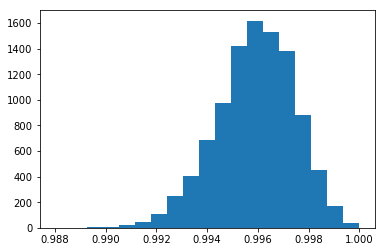

In [42]:
plt.hist(scores, bins=19)

In [90]:
labels_pred = clf.predict(batch_test)

print(accuracy_score(labels_test, labels_pred))
print(confusion_matrix(labels_test, labels_pred))

0.996
[[499   0   1]
 [  0 499   1]
 [  4   0 496]]


In [55]:
core_errors = samples_test[(labels_test == 1) & (labels_pred != 1)]
delta_errors = samples_test[(labels_test == 2) & (labels_pred != 2)]
neg_errors = samples_test[(labels_test == 3) & (labels_pred != 3)]

print(core_errors.shape, delta_errors.shape, neg_errors.shape)

(1, 1600) (1, 1600) (4, 1600)


In [85]:
def plot_errors(errors):
    plt.figure(figsize=(16,1))
    n_errors = errors.shape[0]
    i = 1
    for error in errors:
        plt.subplot(1, n_errors, i)
        plt.imshow(error.reshape(40,40), cmap='gray')
        i += 1

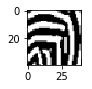

In [86]:
plot_errors(core_errors)

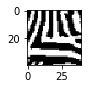

In [87]:
plot_errors(delta_errors)

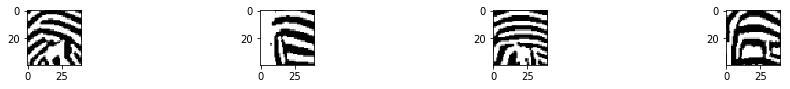

In [88]:
plot_errors(neg_errors)

In [34]:
best_pipe = clf.best_estimator_
kbest = best_pipe.steps[1][1]

In [35]:
best_features = np.sort(np.argsort(kbest.scores_)[-kbest.k:])
print(best_features.shape, best_features, sep='\n')

(380,)
[  0   1   2   4   5   6   8   9  10  11  13  14  15  17  18  19  20  21
  22  23  24  26  27  28  29  30  31  32  33  35  36  37  38  40  41  42
  44  45  46  47  49  50  51  54  55  56  58  59  60  62  63  64  65  67
  68  69  71  72  73  74  75  76  77  78  81  82  84  85  86  87  90  91
  92  94  95  96  99 100 101 102 103 105 108 109 111 112 114 116 117 118
 120 121 122 125 126 127 129 130 132 134 135 136 138 139 143 144 145 146
 147 148 152 153 154 155 156 157 159 161 162 163 165 166 169 170 171 172
 174 175 178 179 180 181 182 183 184 186 188 189 190 191 193 195 197 198
 199 201 202 205 206 207 208 209 210 211 215 217 218 222 225 226 227 228
 231 235 236 243 244 246 251 252 253 255 256 260 261 262 264 265 269 270
 271 273 274 277 278 279 280 282 283 286 287 288 292 293 295 296 297 301
 302 304 305 306 308 310 311 312 313 314 315 317 318 319 320 321 322 323
 324 328 329 331 332 333 337 338 339 340 341 342 344 345 346 347 348 349
 350 353 354 357 358 359 366 369 372 375 376

In [38]:
np.savetxt('C:\\Users\\Pesquisa\\Documents\\Arnaldo\\Singularidades\\scores.txt', scores, fmt='%.5f', delimiter=',')